In [1]:
import qiskit
import numpy as np

from utils import LoadData
from QVC import VariationalClassifier
from qiskit.circuit.library import PauliFeatureMap

In [16]:
# Define quantum feature map
qfm = PauliFeatureMap(feature_dimension = 3,
                      reps = 2,
                      entanglement = 'linear',
                      alpha = 1,
                      paulis = ['Z', 'ZZ'])
print(qfm)

     ┌───┐┌──────────┐                                       ┌───┐»
q_0: ┤ H ├┤ U1(x[0]) ├──■─────────────────────────────────■──┤ H ├»
     ├───┤├──────────┤┌─┴─┐┌───────────────────────────┐┌─┴─┐└───┘»
q_1: ┤ H ├┤ U1(x[1]) ├┤ X ├┤ U1((π - x[0])*(π - x[1])) ├┤ X ├──■──»
     ├───┤├──────────┤└───┘└───────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ U1(x[2]) ├───────────────────────────────────────┤ X ├»
     └───┘└──────────┘                                       └───┘»
«              ┌──────────┐                                   »
«q_0: ─────────┤ U1(x[0]) ├────────────────────────────────■──»
«              └──────────┘             ┌───┐┌──────────┐┌─┴─┐»
«q_1: ───────────────────────────────■──┤ H ├┤ U1(x[1]) ├┤ X ├»
«     ┌───────────────────────────┐┌─┴─┐├───┤├──────────┤└───┘»
«q_2: ┤ U1((π - x[1])*(π - x[2])) ├┤ X ├┤ H ├┤ U1(x[2]) ├─────»
«     └───────────────────────────┘└───┘└───┘└──────────┘     »
«                                                                           

In [3]:
# Define variational circuit
vc = qiskit.circuit.QuantumCircuit(3)
vcpv = qiskit.circuit.ParameterVector('theta', 16)
for i in range(2):
    vc.ry(vcpv[0+8*i] , 0)
    vc.ry(vcpv[1+8*i] , 1)
    vc.rz(vcpv[2+8*i] , 0)
    vc.rz(vcpv[3+8*i] , 1)
    vc.cz(0, 1)
    vc.ry(vcpv[4+8*i] , 1)
    vc.ry(vcpv[5+8*i] , 2)
    vc.rz(vcpv[6+8*i] , 1)
    vc.rz(vcpv[7+8*i] , 2)
    vc.cz(1, 2)
vc.draw()

┌──────────────┐┌──────────────┐   ┌──────────────┐┌───────────────┐   »
q_0: ┤ Ry(theta[0]) ├┤ Rz(theta[2]) ├─■─┤ Ry(theta[8]) ├┤ Rz(theta[10]) ├───»
     ├──────────────┤├──────────────┤ │ ├──────────────┤└┬──────────────┤   »
q_1: ┤ Ry(theta[1]) ├┤ Rz(theta[3]) ├─■─┤ Ry(theta[4]) ├─┤ Rz(theta[6]) ├─■─»
     ├──────────────┤├──────────────┤   └──────────────┘ └──────────────┘ │ »
q_2: ┤ Ry(theta[5]) ├┤ Rz(theta[7]) ├─────────────────────────────────────■─»
     └──────────────┘└──────────────┘                                       »
«                                                                            »
«q_0: ───────────────────────────────────■───────────────────────────────────»
«      ┌──────────────┐┌───────────────┐ │ ┌───────────────┐┌───────────────┐»
«q_1: ─┤ Ry(theta[9]) ├┤ Rz(theta[11]) ├─■─┤ Ry(theta[12]) ├┤ Rz(theta[14]) ├»
«     ┌┴──────────────┤├───────────────┤   └───────────────┘└───────────────┘»
«q_2: ┤ Ry(theta[13]) ├┤ Rz(theta[15]) ├─────────────────────────────────────»
«     └───────────────┘└───────────────┘                                     »
«        
«q_0: ───
«        
«q_1: ─■─
«      │ 
«q_2: ─■─
«

In [4]:
# Define boolean function
def bf(bs):
    if len([i for i in bs if i == '0']) > len([i for i in bs if i == '1']):
        return 1
    else:
        return -1

In [5]:
# Load Data
TrainData, TrainLabels, TestData, TestLabels = LoadData(0.2, 3, seed=30)

In [6]:
# Make classifier and train it
qvc = VariationalClassifier(qfm, vc, bf, False)
print(qvc.train(TrainData, (-1)**TrainLabels, 'zzzpfm_c12v3_qiskit'))

(array([ 1.56636433, -0.72325934, -0.94454689,  1.72973839,  0.91390905,
        1.47260758,  1.40753721,  1.61813452,  1.65474997,  1.65748732,
        2.70052991,  2.21620275,  0.77342995, -0.57277874, -1.83137667,
        0.5672403 ]), 0.18115268298504136, 750)


In [8]:
print(qvc.test(TestData, (-1)**TestLabels))

0.6190476190476191


In [9]:
print(qvc.test(TrainData, (-1)**TrainLabels))

0.8148148148148148


In [10]:
len(TestData)

21

In [11]:
len(TrainData)

81

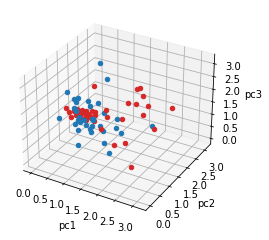

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red']
for dp, l in zip(TrainData, TrainLabels):
    ax.scatter(dp[0], dp[1], dp[2], c = colors[int(l)])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.savefig('./figures/zzzpfm_c12_train_qiskit.png')

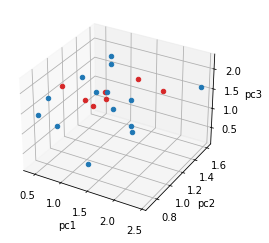

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red']
for dp, l in zip(TestData, TestLabels):
    ax.scatter(dp[0], dp[1], dp[2], c = colors[int(l)])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.savefig('./figures/zzzpfm_c12_test_qiskit.png')

In [15]:
np.save('./npy_files/TrainData_zzpfmc12_qiskit.npy', TrainData)
np.save('./npy_files/TestData_zzpfmc12_qiskit.npy', TestData)
np.save('./npy_files/TrainLabels_zzpfmc12_qiskit.npy', TrainLabels)
np.save('./npy_files/TestLabels_zzpfmc12_qiskit.npy', TestLabels)
np.save('./npy_files/Optimal_param_zzpfmc12_qiskit.npy', qvc.optimal_params)